<a href="https://colab.research.google.com/github/DataMounster/DS-Unit-1-Sprint-2-Statistics/blob/master/Elif_Ayar__of_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



**Assignment Start Here:**



1) Write a function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000.

a) What is the probability that a person is drunk after one positive breathalyzer test?


In [0]:
# Let's define the variables first based on the given information.
drunk= 1/1000
not_drunk= 1 - drunk  
pos_given_drunk = 1 # true positive
pos_given_non_drunk = 0.08 #false positve

# First iteration of Bayes Rule (Bayes Theorem)
conditional= pos_given_drunk
prior=drunk
marginal = (pos_given_drunk*drunk) + (pos_given_non_drunk*not_drunk)
posterior_probability = (conditional*prior)/marginal

print(posterior_probability)

0.012357884330202669


The probability that a person is drunk after first positive breathalyzer test is 0.01235788433. This is perty low. 


b) What is the probability that a person is drunk after two positive breathalyzer tests?

In [0]:
# the same person will take the second breathalyzer test
drunk=posterior_probability
non_drunk=1-drunk

# Rest of the variables are the same as above, so just copy and paste
pos_given_drunk = 1 # true positive
pos_given_non_drunk = 0.08 #false positve

# second iteration of Bayes Rule (Bayes Theorem)

conditional= pos_given_drunk
prior=drunk
marginal = (pos_given_drunk*drunk) + (pos_given_non_drunk*not_drunk)
posterior_probability = (conditional*prior)/marginal

print(posterior_probability)

0.6262631956114275


The probability that a person is drunk after two positive breathalyzer tests is 0.13525210993291495. That means the probability is not enough approaching to 1, and not still realiable result.

c)How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

To able to answer this questions, I first need to create a function, then I can run as mamy time as I need to reach or close the probability 1


In [0]:
# Create a function and turn all of that into the function
# The function def is given to me 
# def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):"
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
    posterior=prob_drunk_prior
    for test in range(0, 1):
        drunk = posterior
        non_drunk = 1 - drunk  
        conditional = 1  # this is the prob_given_drunk
        prior=drunk
        pos_given_non_drunk= false_positive_rate  # this is the false positive rate
        marginal=(conditional*prior)+(pos_given_non_drunk*non_drunk)
        posterior = (conditional*prior)/marginal
    return posterior



In [0]:
# let's try
prob_drunk_given_positive(1/1000,0.08)

# Function is working if I try just one time run.

0.012357884330202669

When I run for loop only in the range of (0,1), It give the same probability which I get above. I have to find at least 95% of people who are drunk with positive test. Thus, I will run the same function in the range of 0-4. 


In [0]:
# copy and paste, then run in range (0,1000)
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
    posterior=prob_drunk_prior
    for test in range(0, 4):
        drunk = posterior
        non_drunk = 1 - drunk  
        conditional = 1  # this is the prob_given_drunk
        prior=drunk
        pos_given_non_drunk= false_positive_rate  # this is the false positive rate
        marginal=(conditional*prior)+(pos_given_non_drunk*non_drunk)
        posterior = (conditional*prior)/marginal
    return posterior


In [0]:
prob_drunk_given_positive(1/1000, 0.08)

0.9606895076105054

To sum up, to able to reach the at least 95% people are drunk with positive test, I have to run at least 4 times or more. 

2) Explore scipy.stats.bayes_mvs



In [0]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
adults = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

In [0]:
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# Let's look at the hours-per-week
adults['hours-per-week'].mean()

40.437455852092995

In [0]:
# Confidence interval with scipy.stats.bayes_mvs

CI_adults_bayes=stats.bayes_mvs(adults['hours-per-week'], alpha=0.95)[0][1]
CI_adults_bayes

(Mean(statistic=40.437455852092995, minmax=(40.303343406780165, 40.571568297405825)),
 Variance(statistic=152.45431279269027, minmax=(150.11249049743995, 154.7961350879406)),
 Std_dev(statistic=12.34723907570799, minmax=(12.252407256185776, 12.442070895230202)))

The mean is certainly inside of the confidence interval

In [0]:
adults.shape

(32561, 15)

In [0]:
# Let's do frequentist apprach
CI_adults_t=stats.t.interval(0.95, adults.shape[0], loc=adults['hours-per-week'].mean(),
                             scale=stats.sem(adults['hours-per-week']) )
CI_adults_t

(40.30333636181343, 40.57157534237256)

The same confidence interval

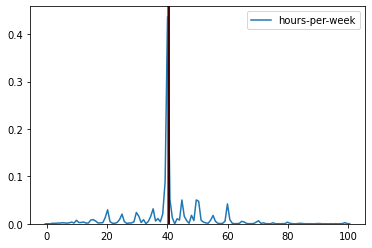

In [0]:
#Let's make a graph with KDE.
sns.kdeplot(adults['hours-per-week'])
plt.axvline(x=CI_adults_bayes[0], color='r')
plt.axvline(x=CI_adults_bayes[1], color='r')
plt.axvline(x=adults['hours-per-week'].mean(), color='k');



Very strange graph, but It works


3) In your own words, summarize the difference between Bayesian and Frequentist statistics

Frequentist statistics is only one samlpe distribution and we might make a conclusion about Null Hypothesis is right or not. Taking a sample from populations, finding its mean and confidence interval, we could drive the point that population mean should be between these confidence interval numbers. If not, we can say 95% confidence, our null hypothesis on the population mean can be rejected. 

Bayesian statistics is not only one sample distribution. Bayesian has three steps. First step is a belief about he world. Thus, we built  our first prior and likelihood function, and then we can create the model for belief about the data. Second step is that collection of data and use of our prior belief probabilit to update and check our model whether it is matching with original data or not. Then if the model we create is working, we can update the data with that model in order to understand and predict the posterior data and distribution.

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!